In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

plt.rcParams['figure.figsize'] = [15.0, 8.0]
plt.rcParams['figure.dpi'] = 300 

In [2]:
data_l = pd.read_html('http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode142.html')
data_l

[   0     1                                                  2
 0  :  popu                                         population
 1  :  giph                Gross Internal Product per habitant
 2  :  ripo                 rate of increase of the population
 3  :  rupo                           rate of urban population
 4  :  rlpo               rate of illiteracy in the population
 5  :  rspo                 rate of students in the population
 6  :  eltp                        expected lifetime of people
 7  :  rnnr                 rate of nutritional needs realized
 8  :  nunh  number of newspapers and magazines per 1000 ha...
 9  :  nuth            number of television per 1000 habitants,
       0              1    2          3    4            5
 0   AFS   South Africa  DAN    Denmark  MAR      Marocco
 1   ALG        Algeria  EGY      Egypt  MEX       Mexico
 2   BRD        Germany  ESP      Spain  NOR       Norway
 3   GBR  Great Britain  FRA     France  PER         Peru
 4   ARS   Saudi

In [3]:
len(data_l)

3

In [59]:
geopol = data_l[2].copy()
geopol.columns = geopol.iloc[0]
geopol.drop(0, axis=0, inplace=True)
geopol.set_index(geopol.columns[0], inplace=True)
geopol.index.name = None
geopol = geopol.astype("float64")
geopol.head()

,popu,giph,ripo,rupo,rlpo,rspo,eltp,rnnr,nunh,nuth
AFS,37.00,2492.0,2.00,58.9,44.0,1.08,60.0,120.0,48.0,98.0
ALG,24.60,1960.0,3.00,44.7,50.4,0.73,64.0,112.0,21.0,71.0
BRD,62.00,19610.0,0.40,86.4,2.0,2.72,72.0,145.0,585.0,759.0
GBR,57.02,14575.0,0.04,92.5,2.2,1.90,75.0,128.0,421.0,435.0
ARS,14.40,5980.0,2.70,77.3,48.9,0.91,63.0,125.0,34.0,269.0


In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(geopol)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.99016390e-01 6.19482016e-04]
[53072.78583743  1321.59969418]


In [117]:
pca.components_

array([[-4.98264935e-03,  9.99607985e-01, -7.78854322e-05,
         1.36785229e-03, -1.64093448e-03,  9.08245353e-05,
         6.10142481e-04,  7.21677365e-04,  1.79066868e-02,
         2.08069513e-02],
       [ 9.98481898e-01,  5.70671034e-03, -4.79533493e-04,
        -3.56460229e-02,  1.02005388e-02, -7.31987656e-04,
        -1.35096010e-03, -9.11739419e-03,  7.99623124e-03,
        -3.84315749e-02]])

In [119]:
geopol_red = pd.DataFrame(
    pca.transform(geopol), 
    columns=["pc1", "pc2"], 
    index=geopol.index
)
geopol_red.head()

,pc1,pc2
AFS,-6146.031296,-81.107349
ALG,-6678.839595,-95.063971
BRD,10988.635081,18.779604
GBR,5945.953073,-3.849360
ARS,-2655.956245,-91.107536


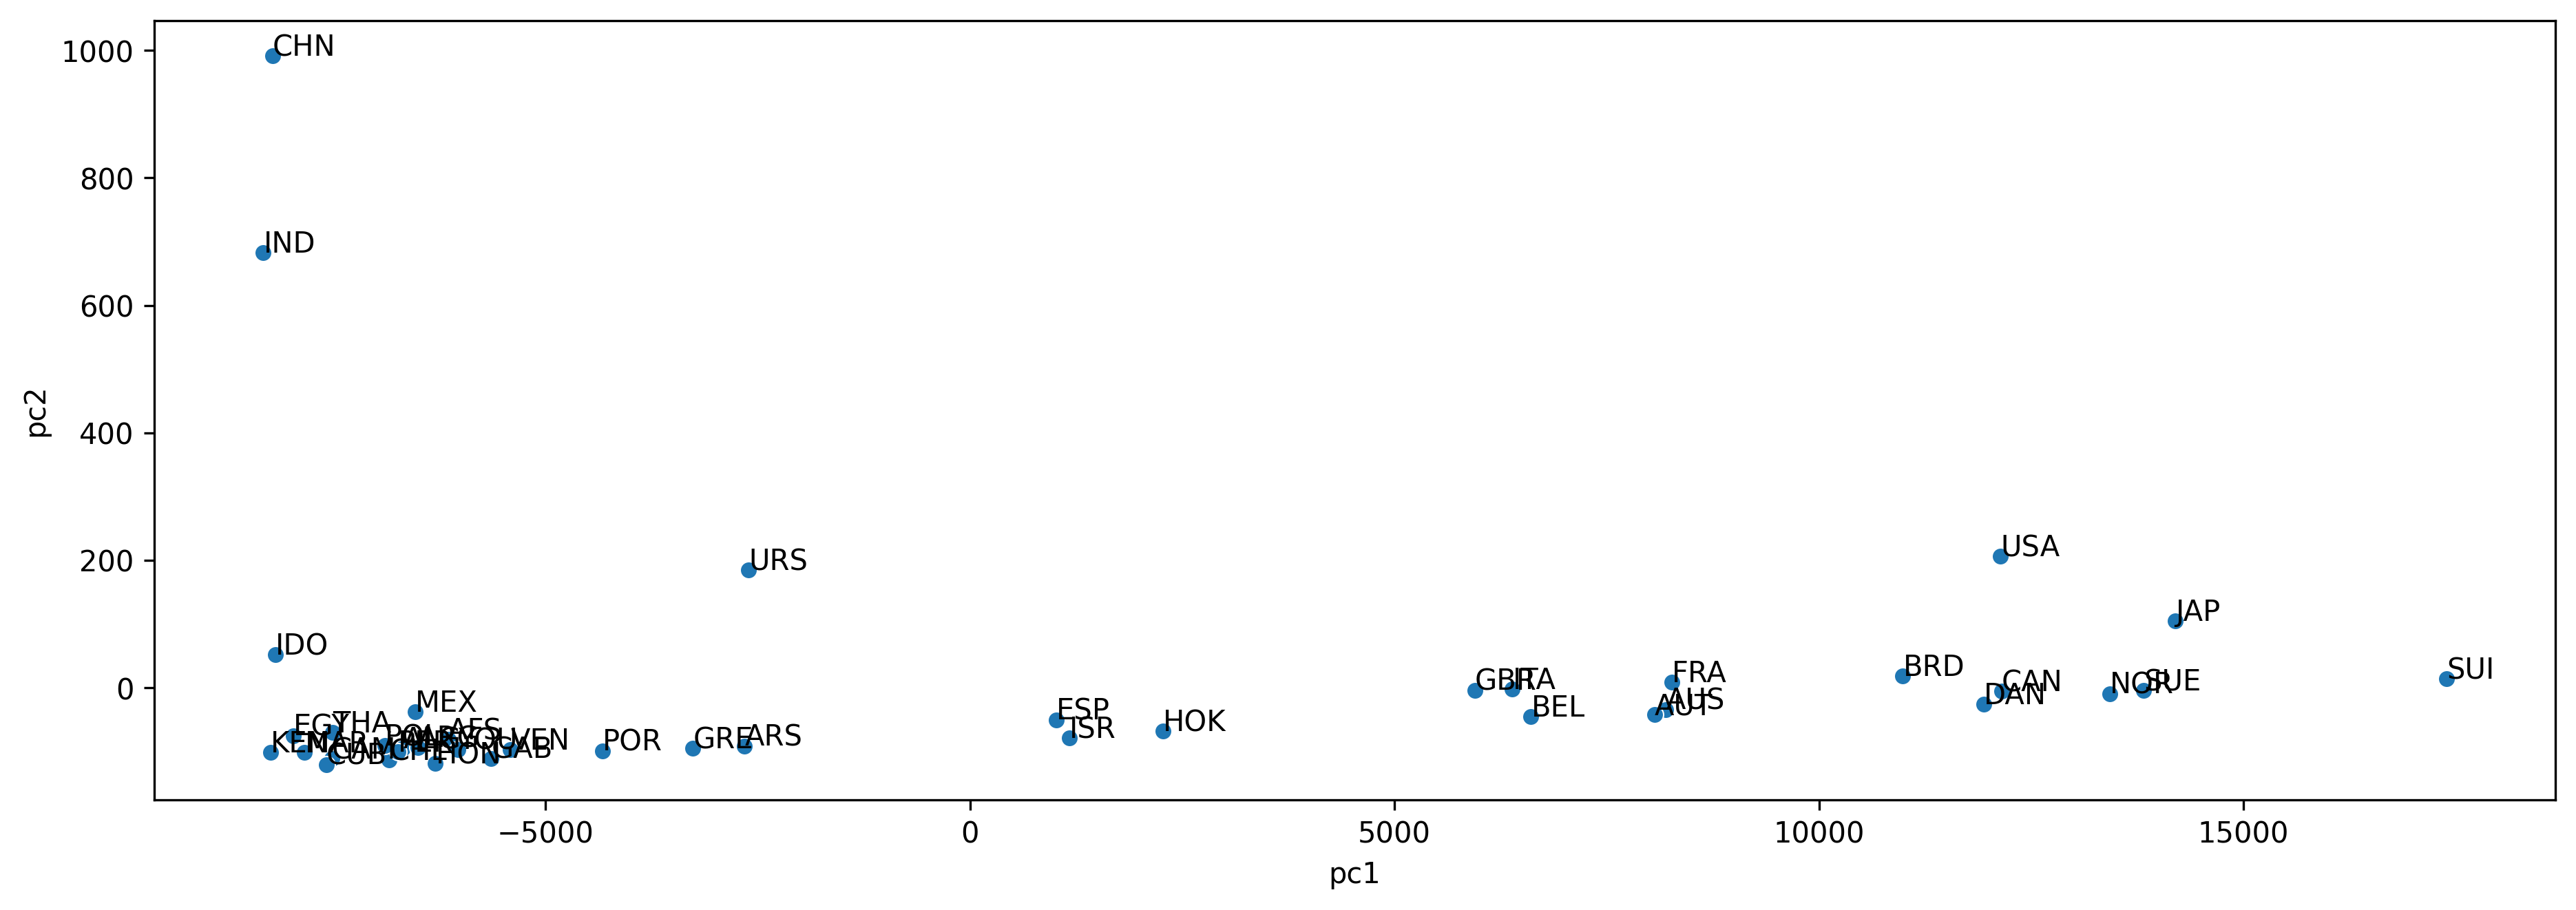

In [121]:
f, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.scatterplot(x="pc1", y="pc2", data=geopol_red, ax=ax)

for i in range(df.shape[0]):
    plt.text(x=geopol_red.pc1[i]+0.3,y=geopol_red.pc2[i]+0.3,s=geopol_red.index[i])


In [188]:
np.add(np.arange(9).astype(str), np.array(["pc"]).astype(str))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U2')) -> None

/home/lev/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([[-1.24243305e+00,  6.19984614e+00],
       [ 6.32455477e+00,  8.99112664e-04],
       [-3.80608295e+00, -5.83537815e-01],
       [ 3.33207617e+00, -2.16229451e+00],
       [-3.73807366e+00,  5.78639091e-01],
       [ 3.85763713e+00, -7.74194339e-01],
       [ 4.37084310e+00, -2.40993051e-01],
       [ 2.52896317e+00, -7.95606272e-01],
       [ 5.06357288e+00,  5.63060702e-02],
       [ 5.34484870e+00, -2.45834704e-01]])

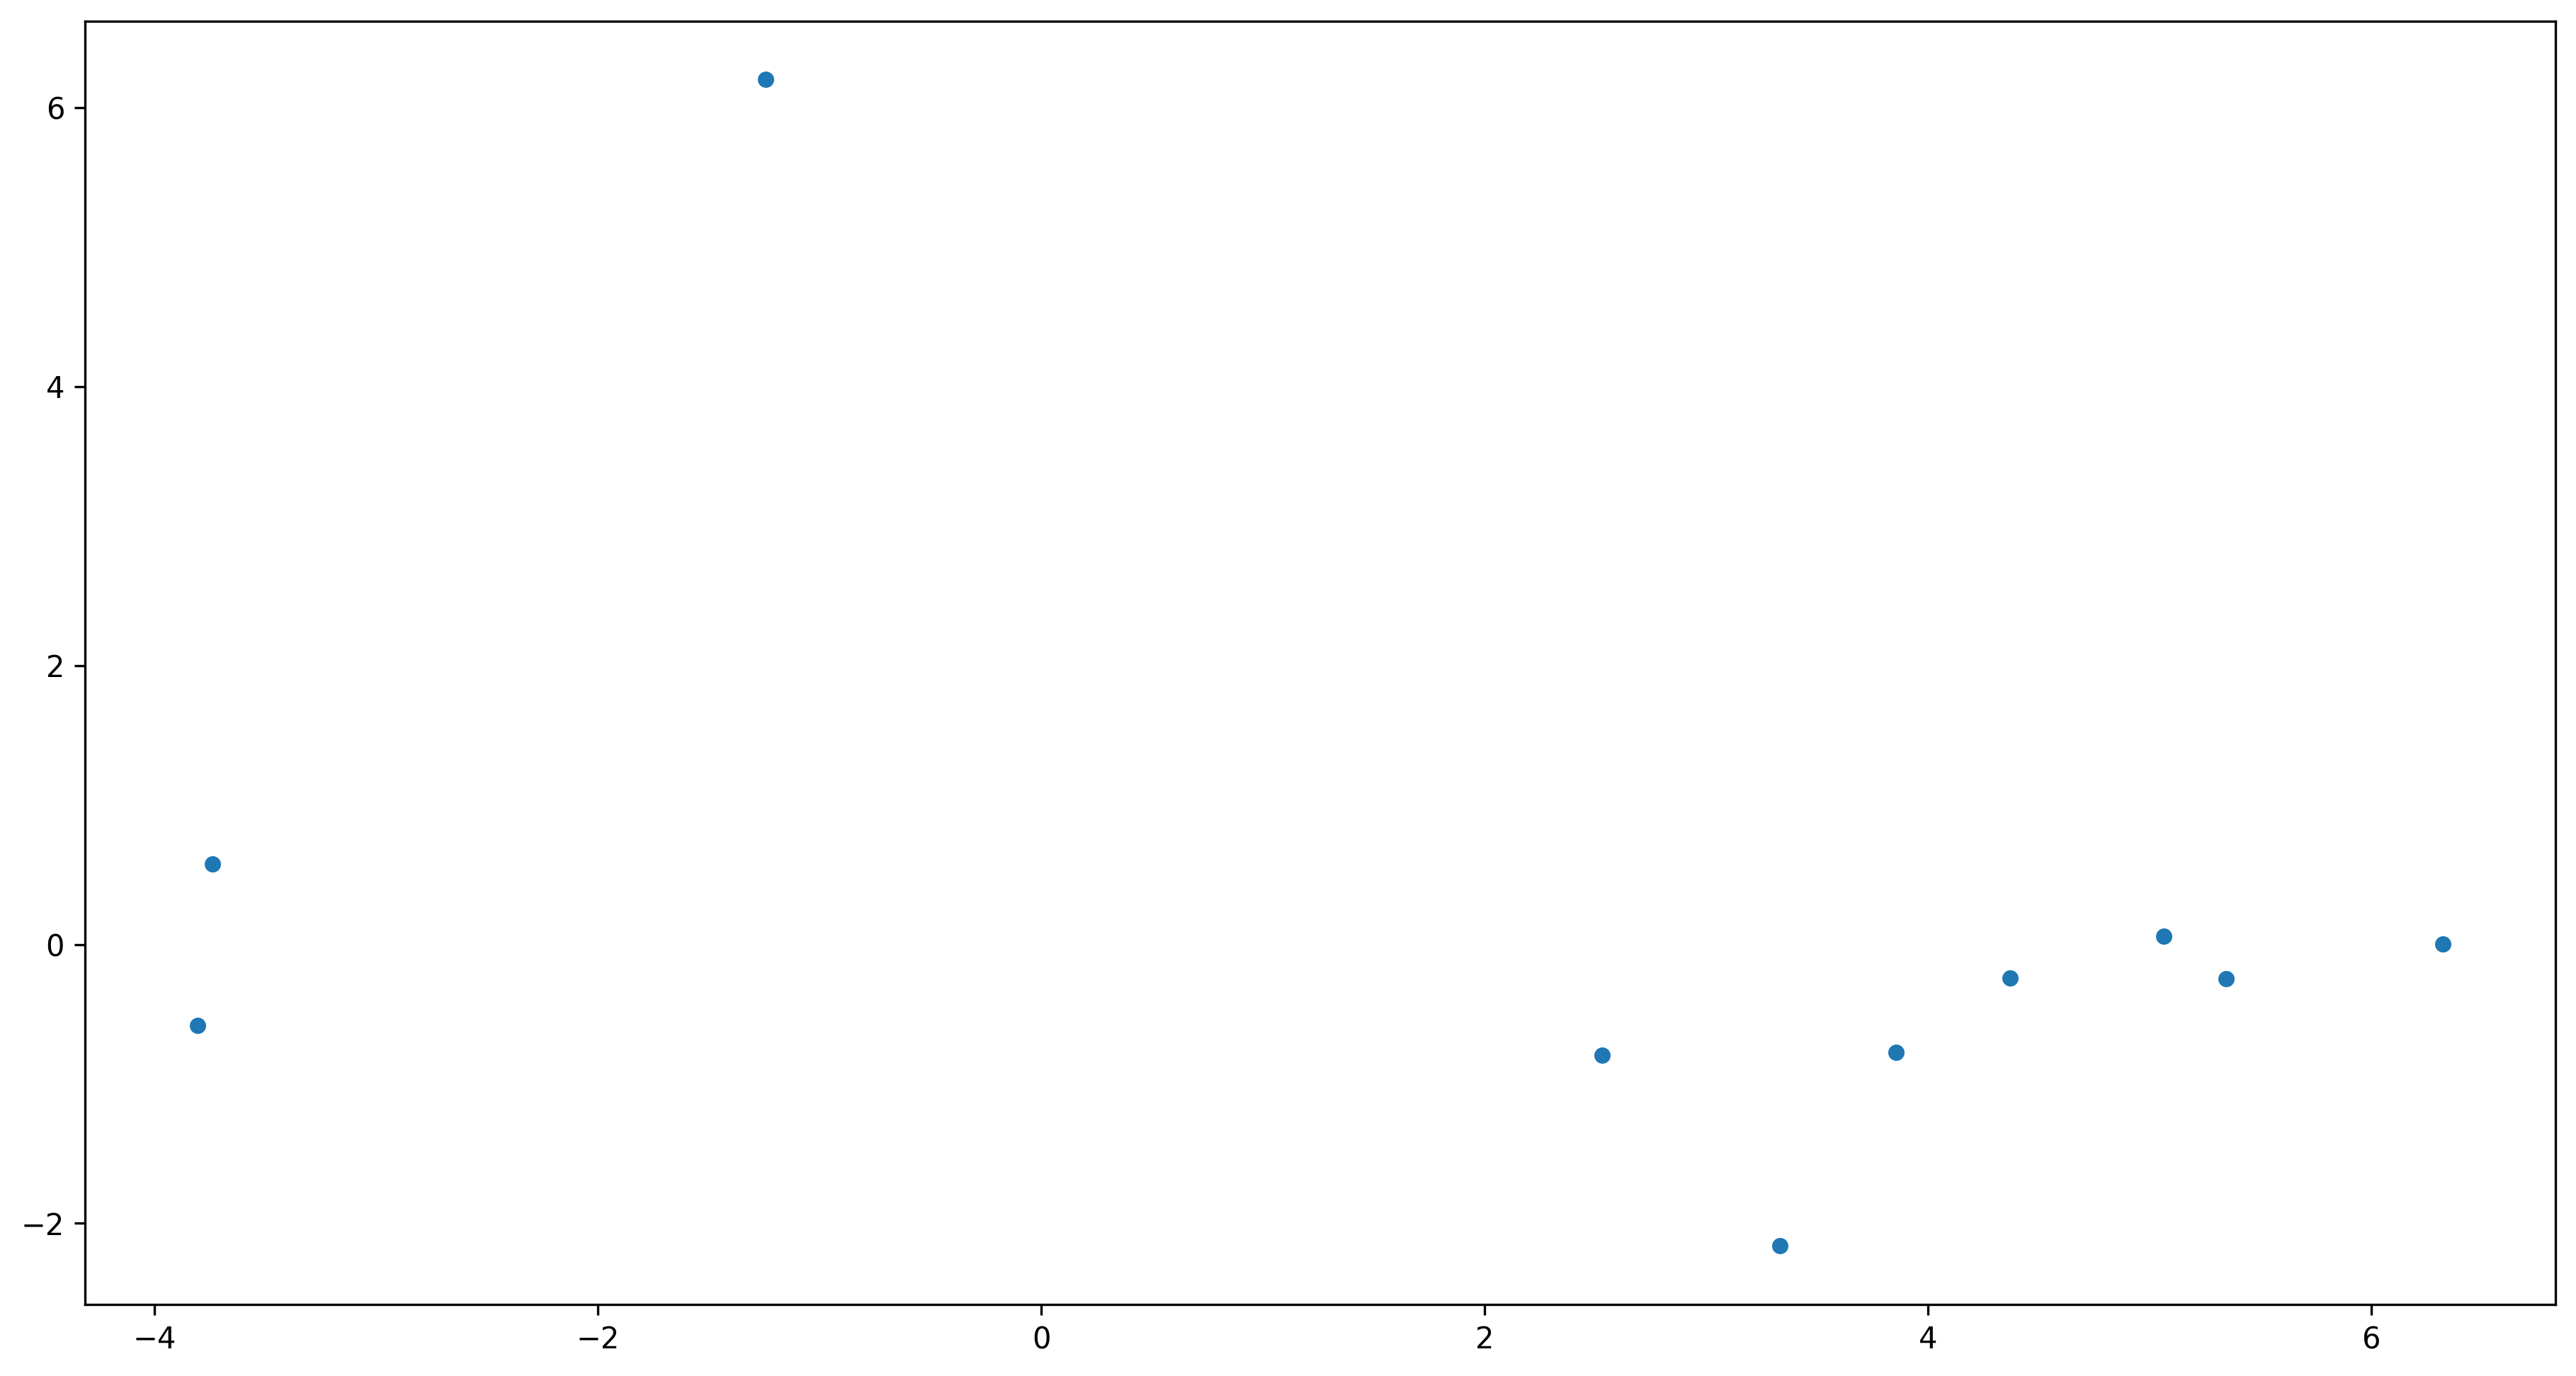

In [160]:
b = np.tile(geopol.std(), 2).reshape(2, 10).T
a = pca.components_.T * pca.singular_values_ / b

sns.scatterplot(a[:, 0], a[:, 1])

In [123]:
r_xy = pca.components_ * pca.singular_values_ / geopol.std()
r_xy

ValueError: operands could not be broadcast together with shapes (2,10) (2,) 

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

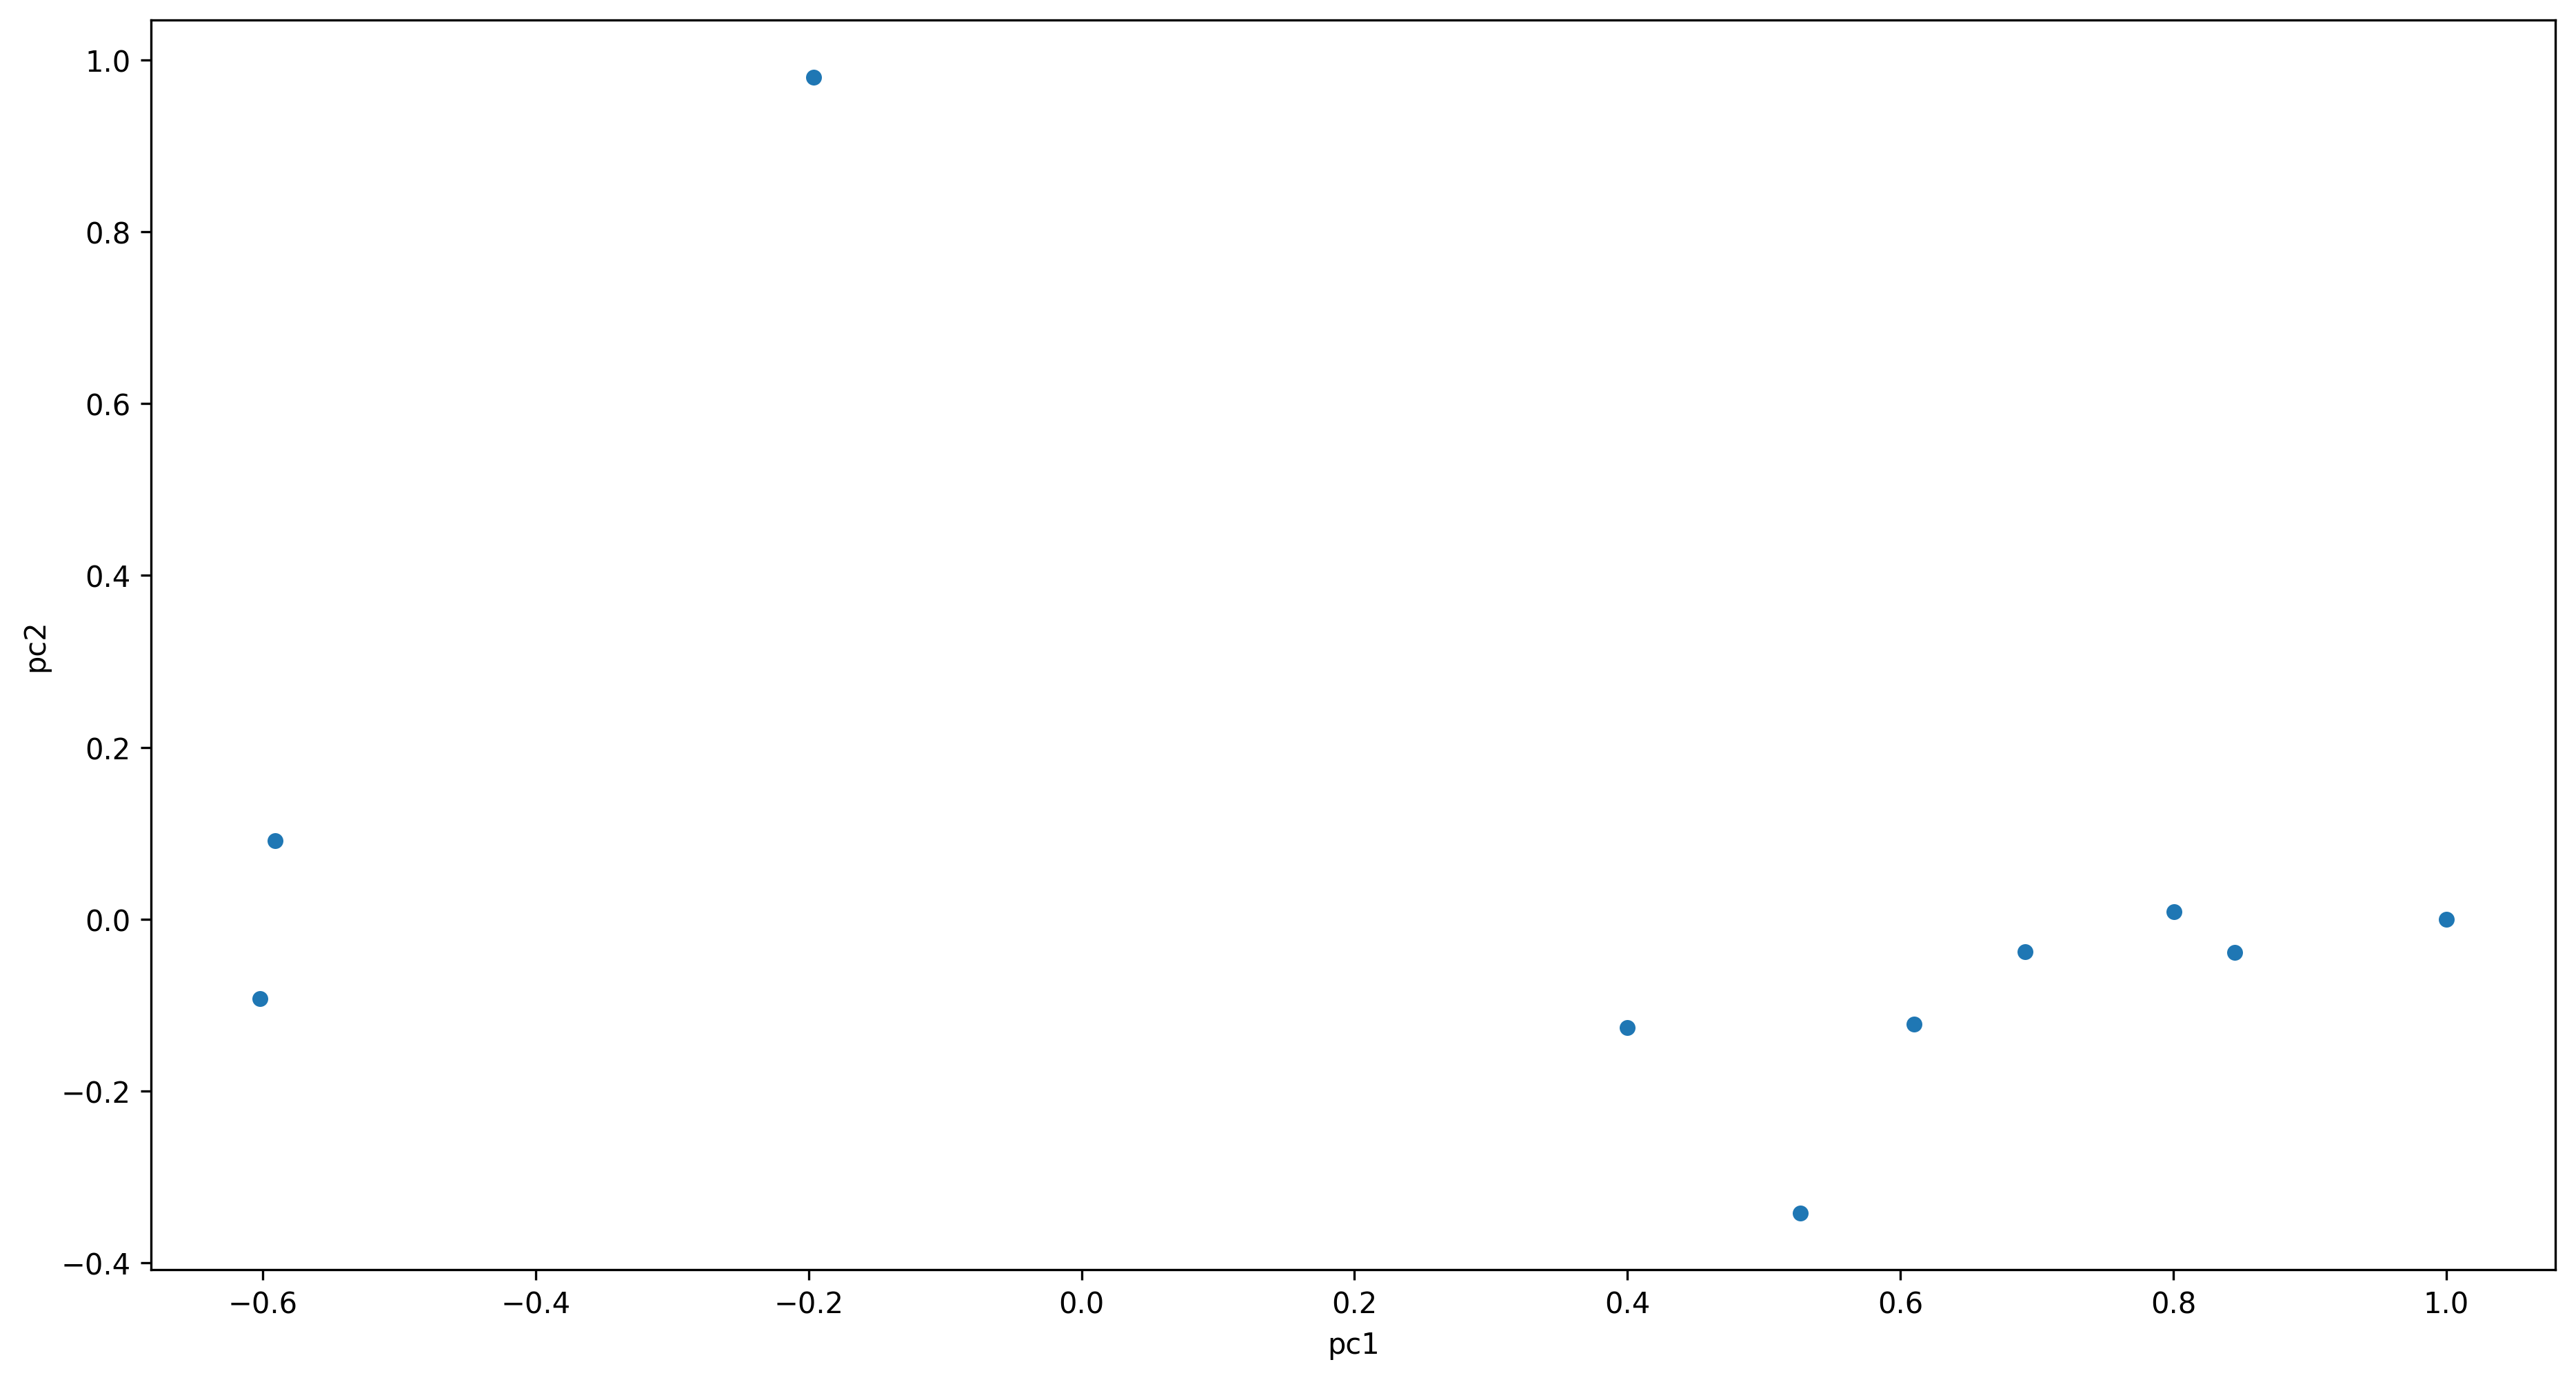

In [187]:
corrs = pd.concat([geopol, geopol_red], axis=1).corr().loc[["pc1", "pc2"]].T.iloc[:-2]
corrs
sns.scatterplot(x=corrs.iloc[:, 0], y=corrs.iloc[:, 1])